In [1]:
import os
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
data_path = "./Data"
os.chdir(data_path)

In [3]:
oil_price = pd.read_csv("oil_price.csv", parse_dates=True, squeeze=True, index_col=0)

In [4]:
oil_price.head()

DATE
1986-01-01    22.93
1986-02-01    15.45
1986-03-01    12.61
1986-04-01    12.84
1986-05-01    15.38
Name: VALUE, dtype: object

In [5]:
type(oil_price.index)

pandas.tseries.index.DatetimeIndex

In [6]:
oil_price[oil_price == '.'] = None

In [7]:
oil_price = pd.to_numeric(oil_price)

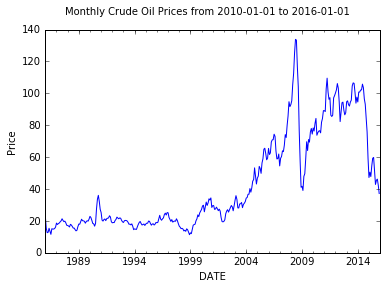

In [9]:
oil_price.plot()
plt.suptitle('Monthly Crude Oil Prices from 1986-01-01 to 2016-01-01')
plt.ylabel('Price')

In [ ]:
oil_price = oil_price[oil_price.index >= datetime.datetime(2010, 1, 1)]

In [ ]:
oil_price.plot()
plt.suptitle('Monthly Crude Oil Prices from 2010-01-01 to 2016-01-01')
plt.ylabel('Price')

In [13]:
# Data taken from http://www.stats.gov.nl.ca/statistics/Labour/PDF/UnempRate_Monthly.pdf

canada_unemp_gov = pd.read_csv('Canada_UnempRate_Monthly_2015.csv', delimiter=' ')

In [14]:
canada_unemp_gov.index = pd.to_datetime("01-" + canada_unemp_gov['Date'])
del canada_unemp_gov['Date']

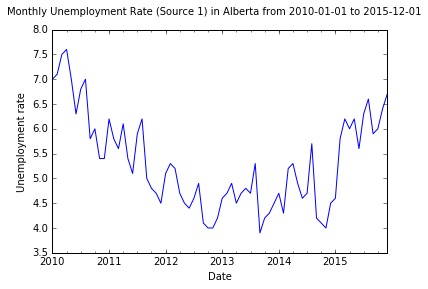

In [15]:
canada_unemp_gov['Alberta'].plot()
plt.suptitle('Monthly Unemployment Rate (Source 1) in Alberta from 2010-01-01 to 2015-12-01')
plt.ylabel('Unemployment rate')

In [21]:
# Data taken from http://economicdashboard.albertacanada.com/Unemployment

canada_unemp_edb = pd.read_csv('Canada_unemp_rate.csv', index_col=0, parse_dates=True)

In [29]:
canada_unemp_edb['AgeGroup'] = canada_unemp_edb['AgeGroup'].astype('category')
canada_unemp_edb['Sex'] = canada_unemp_edb['Sex'].astype('category')

In [32]:
canada_unemp_edb.dtypes

AgeGroup                   category
Sex                        category
Alberta                     float64
BritishColumbia             float64
Canada                      float64
Manitoba                    float64
NewBrunswick                float64
NewfoundlandAndLabrador     float64
NovaScotia                  float64
Ontario                     float64
PrinceEdwardIsland          float64
Quebec                      float64
Saskatchewan                float64
dtype: object

In [ ]:
oilp_emp = pd.concat([oil_price, 100 - canada_unemp_gov['Alberta']], axis=1)
oilp_emp.columns = ['Oil Price', 'Emp Rate (Alberta)']

In [ ]:
oilp_emp = oilp_emp[np.isfinite(oilp_emp['Oil Price']) & np.isfinite(oilp_emp['Emp Rate (Alberta)'])]

In [ ]:
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(oilp_emp), columns=oilp_emp.columns, index=oilp_emp.index)

In [ ]:
scaled_data.plot()
plt.suptitle('Oil Price and Alberta Employment Rate from 2010-01-01 to 2015-12-01')